In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from math import sqrt

from pydataset import data
import seaborn as sns
alpha = 0.05
import datetime

####  Has the network latency gone up since we switched internet service providers?

- null hyptohesis $H_{0}$ = Internet service has no impact on network latency - latency is the same sinceISP switch

- alternative hypothesis $H_{a}$ = Newtork latency has gone up since switching internet service providers - the new ISP has higher latency

- True positive = We reject $H_{0}$, our latency is ~300ms on average with the new IPS, it was ~50ms previously

- False positive = We reject $H_{0}$, our data says the latency is higher; maybe our data is biased, we took recordings between 6pm and 8pm when everyone is streaming media

- Type 1 error/False Negative: we fail to reject $H_{0}$: maybe we tok recordings between 6am and 7am when no one is on the network

- Type 2 error/True Negative: Our data says there isn't much difference in latency and we fail to recect $H_{0}$

####  Is the website redesign any good?

- null hyptohesis $H_{0}$ = The website has no impact on whether it is good - clicks have not changed since the redesign

- alternative hypothesis $H_{a}$ = The website has had more clicks since the site redesign

- True positive = I reject the $H_{0}$, and the web redesign helped, and it really did

- False positive = I accept the $H_{0}$, and the web redesign helped, but it really didn't; maybe we only showed the new website to previously engaged customers

- Type 1 error/False Negative: failed to reject $H_{0}$, we conclude the redesign did not help, but it really did; maybe we only showed the new website to ppl who provided negative feedback

- Type 2 error/True Negative: fail to reject the $H_{0}$, we conclude the redesign did not help, and it really didn't

####  Is our television ad driving more sales?


- null hyptohesis $H_{0}$  = The television ads are not driving sales - Cool ranch doritos don't sell any better when we're running an advertisement

- alternative hypothesis $H_{a}$ = The television ads are having a positive impact on driving sales - sales for cool ranch doritos increase when we're running an ad

- True positive = I reject the $H_{0}$, we conclude the ad helped, and it did

- False Positive = I reject the $H_{0}$, we conclude that the advertisement helped sales, but really, it didn't

- Type 1 error/False Negative: we reject the null $H_{0}$ we conclude that the ad did not help, but it really did 

- Type 2 error/True Negative: fail to reject $H_{0}$, we conclude the ad did not boost sales, and really it didn't

####  Does having a basement affect house sales?

- null hyptohesis $H_{0}$  = Having a basement does not affect house sales

- alternative hypothesis  $H_{a}$ = Having a basement increases house sales

- True positive = I reject the $H_{0}$, having a basement drives sales

- True negavite = I accept the $H_{0}$, houses with basements do not sell as much

- Type 1 error: we reject the null $H_{0}$  houses with basements do not drive sales

- Type 2 error: we accept the $H_{0}$, houses with basements do sell more

####  Do single story homes sell more than 2 story?

- null hyptohesis $H_{0}$  = Single story homes do not sell more than 2 story

- alternative hypothesis  $H_{a}$ = Single story homes sell more than 2 story

- True positive = I reject the $H_{0}$, single story homes sell more

- True negavite = I accept the $H_{0}$, single story homes do not sell as much as 2 story

- Type 1 error: we reject the null $H_{0}$  single story homes do not drive sales

- Type 2 error: we accept the $H_{0}$, single story homes sell more than 2 story

####  Do houses with fireplaces affect house sales

- null hyptohesis $H_{0}$  = Houses with fireplaces do not affect house sales

- alternative hypothesis  $H_{a}$ = Houses with fireplaces sell more

- True positive = I reject the $H_{0}$, houses with fireplaces sell more

- True negavite = I accept the $H_{0}$, houses with fireplaces do not sell as much

- Type 1 error: we reject the null $H_{0}$  houses with fireplaces do not sell as much

- Type 2 error: we accept the $H_{0}$, houses with fireplaces sell more

Scenario: suppose we have a production issue while the ad is running -- there's not enough product to sell, sales are low

- FN: conclude that the ad didn't help, but really it did, we just didn't have enough inventory

Scenario: suppose there's a global pandemic, and everyone is staying inside while the ad is running. There's increased sales of cool ranch doritos.

- FP: conclude that the ad helped, when really it didn't, the increased sales are due to the global pandemic

## NEXT LESSON

Ace Realty wants to determine whether the average time it takes to sell homes 
 is different for its two offices. A sample of 40 sales from office #1 revealed 
 a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales 
 from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
 Use a .05 level of significance.

What are we comparing?
- average time(numeric continuous values) to sell for two different groups(categories)

In [35]:
xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

deg_free = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2)/(deg_free))
s_p

17.956702977389302

In [36]:
# Using Scipy

a = 0.05

t, p = stats.ttest_ind_from_stats( 90, 15, 40, 100, 20, 50, equal_var = False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [40]:
p = stats.t(deg_free).cdf(t)*2
p

0.008106780718808984

In [41]:
print(f't= {t:.4f}')
print(f'p= {p:.4f}')

t= -2.7091
p= 0.0081


In [42]:
t, p

(-2.7091418459143854, 0.008106780718808984)

### Load the mpg dataset and use it to answer the following questions:

In [7]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [303]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [44]:
mpg['average_mileage'] = (mpg.cty + mpg.hwy) / 2
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [45]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [46]:
cars_2008 = mpg[mpg.year==2008].average_mileage
cars_1999 = mpg[mpg.year==1999].average_mileage

In [47]:
alpha = 0.05

<AxesSubplot:>

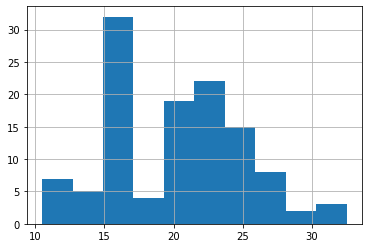

In [48]:
cars_2008.hist()

<AxesSubplot:>

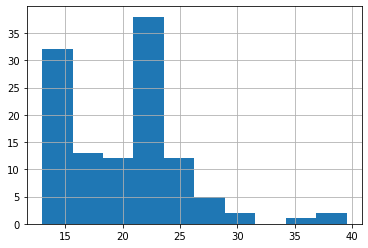

In [49]:
cars_1999.hist()

In [50]:
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

In [51]:
# compute test statistic and probability (t-statistic & p-value)

t,p = stats.ttest_ind(cars_2008, cars_1999)

t, p, alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [52]:
#Since p is greater than our alpha, we fail to reject the null hypothesis. 
#There is not sufficient evidence to suggest fuel efficiencies are different 
# for cars made in 1999 or 2008.

##  #Set Hypothesis

$H_{0}$: Mean of fuel efficiency 1999 = mean of fuel efficiency 2008

$H_{a}$: Mean of fuel efficiency 1999 > mean of fuel efficiency 2008

In [53]:
# Set alpha

alpha = 0.05

In [54]:
# verify assumptions

#What is the fuel efficiency for cars from 1999 - 2008?
mpg_df.hwy.value_counts().head(5)

NameError: name 'mpg_df' is not defined

In [55]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


### Are compact cars more fuel-efficient than the average car?


$H_{0}$: Compact cars are as fuel efficient as all cars

$H_{a}$: Compact cars are more fuel efficient than average cars.

This will be a one tailed, 1 sample t test.


In [56]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [57]:
mpg = mpg.rename(columns = {'class': "car_type"})
compact_fuel = mpg[mpg.car_type=="compact"].average_mileage

In [58]:
list(mpg['car_type'].unique())

['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup', 'subcompact']

In [59]:
def car_type(x):
    if x == 'compact':
        return 'compact'
    else:
        return 'not_compact'
mpg['is_compact'] = mpg.car_type.apply(car_type)

average_fuel = mpg[mpg.is_compact == 'not_compact'].average_mileage

In [60]:
alpha = 0.05

<AxesSubplot:>

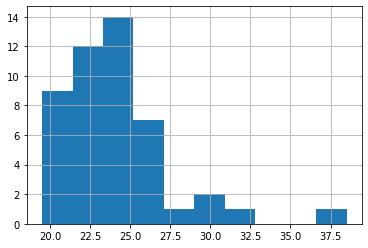

In [61]:
compact_fuel.hist()

<AxesSubplot:>

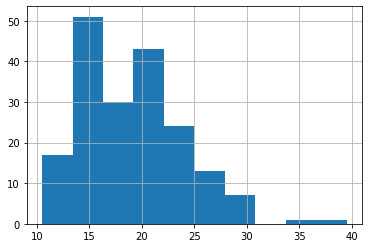

In [62]:
average_fuel.hist()

In [63]:
compact_fuel.var(), average_fuel.var()

(12.442876965772433, 23.652794548904602)

In [64]:
overall_mean = mpg.average_mileage.mean()

In [65]:
t, p, stats.ttest_1samp(compact_fuel, overall_mean)
t, p, alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [66]:
#P is less than alpha, so we reject null hypothesis.
#There is evidence to suggest compact cars are more fuel efficient than average.

### Do manual cars get better gas mileage than automatic cars?


In [67]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,average_mileage,is_compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact


## Correlation Exercises

####  Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [248]:
telco_df = pd.read_csv('Cust_Churn_Telco.csv')

In [249]:
telco_df.shape

(7043, 21)

In [250]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [252]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [255]:
telco_df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [256]:
telco_df['TotalCharges'] = (telco_df['TotalCharges'] + '0').astype(float)

In [257]:
telco_df[telco_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [258]:
telco_df = telco_df.dropna()

In [259]:
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [260]:
telco_df.shape

(7043, 21)

In [261]:
x = telco_df['tenure']
y = telco_df['MonthlyCharges']

In [262]:
r, p = stats.pearsonr(x,y)
r, p

(0.2478998562861525, 4.094044991483017e-99)

Text(0, 0.5, 'MonthlyCharges')

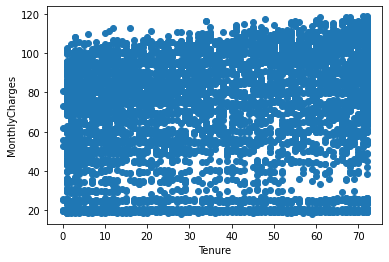

In [263]:
plt.scatter(x,y)
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')

In [264]:
# Does the tenure correlate with total charges?

In [268]:
y2 = telco_df['TotalCharges']

In [269]:
y2

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [270]:
r, p = stats.pearsonr(x, y2)
r, p

(0.38963197449414855, 4.382201025222442e-254)

Text(0, 0.5, 'TotalCharges')

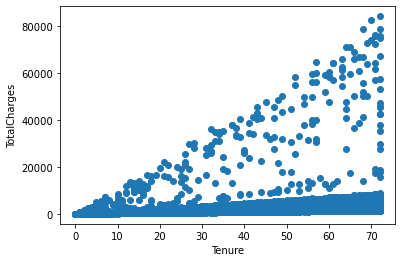

In [271]:
plt.scatter(x,y2)
plt.xlabel('Tenure')
plt.ylabel('TotalCharges')

### Conclusion: there is a positive correlation because p<a, we reject our $H_{0}$ correlation

## What happens if you control for phone and internet service?

In [275]:
x_int_pho_te = telco_df['tenure'][telco_df['PhoneService'] == "No"]
y_int_mc = telco_df['MonthlyCharges'][telco_df['PhoneService'] == "No"]

In [277]:
# plot correlation between monthly charges and phone service
r, p = stats.pearsonr( x_int_pho_te, y_int_mc)
r, p

(0.5857597986661375, 4.6033703473404816e-64)

Text(0, 0.5, 'Monthly Charges')

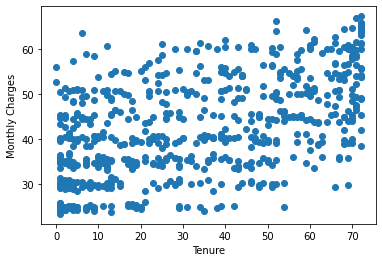

In [278]:
plt.scatter(x_int_pho_te , y_int_mc)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')

### Use the employees database

In [279]:
from env import host, user, password
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url
url = get_db_url(host, user, password, 'employees')

In [284]:
#I join salaries with employees table

query = '''
SELECT
    s.emp_no as emp_no,
    s.salary as salary,
    e.hire_date as hire_date,
    s.to_date as to_date
FROM salaries as s
JOIN employees as e USING (emp_no)
'''

In [286]:
# create a new df with the query above
salaries_df = pd.read_sql(query, url)

In [280]:
pd.read_sql('SELECT * FROM employees', url).head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [281]:
to_date_df = pd.read_sql('select to_date from titles', url)

In [282]:
to_date_df.head(3)

,to_date
0,9999-01-01
1,9999-01-01
2,9999-01-01


In [283]:
salary = pd.read_sql('select salary from salaries', url)

In [33]:
salary.head(3)

,salary
0,60117
1,62102
2,66074


In [ ]:
# Is there a relationship between how long an employee has been with the company 
# and their salary?



In [185]:
# Is there a relationship between how long an employee has been with the company 
# and the number of titles they have had?

titles_df = pd.read_sql('select * from titles', url)

In [186]:
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [187]:
from datetime import date

In [188]:
titles_df['to_date']= titles_df['to_date'].replace(to_replace = titles_df["to_date"].max(), value =date.today())

In [189]:
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,2021-05-11
1,10002,Staff,1996-08-03,2021-05-11
2,10003,Senior Engineer,1995-12-03,2021-05-11
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,2021-05-11


In [190]:
titles_df['tenure'] = (titles_df.to_date - titles_df.from_date)

In [191]:
titles_df

,emp_no,title,from_date,to_date,tenure
0,10001,Senior Engineer,1986-06-26,2021-05-11,12738 days
1,10002,Staff,1996-08-03,2021-05-11,9047 days
2,10003,Senior Engineer,1995-12-03,2021-05-11,9291 days
3,10004,Engineer,1986-12-01,1995-12-01,3287 days
4,10004,Senior Engineer,1995-12-01,2021-05-11,9293 days
...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,1826 days
443304,499997,Senior Engineer,1992-08-29,2021-05-11,10482 days
443305,499998,Senior Staff,1998-12-27,2021-05-11,8171 days
443306,499998,Staff,1993-12-27,1998-12-27,1826 days


In [192]:
# make tenure a string
tenured = titles_df.tenure.astype(str)

In [182]:
tenured

0         12738 days
1          9047 days
2          9291 days
3          3287 days
4          9293 days
             ...    
443303     1826 days
443304    10482 days
443305     8171 days
443306     1826 days
443307     8563 days
Name: tenure, Length: 443308, dtype: object

In [193]:
#strip days
tenured = tenured.str.strip('days').astype(int)

In [194]:
titles_df['tenure']=tenured

In [195]:
titles_df.head()

,emp_no,title,from_date,to_date,tenure
0,10001,Senior Engineer,1986-06-26,2021-05-11,12738
1,10002,Staff,1996-08-03,2021-05-11,9047
2,10003,Senior Engineer,1995-12-03,2021-05-11,9291
3,10004,Engineer,1986-12-01,1995-12-01,3287
4,10004,Senior Engineer,1995-12-01,2021-05-11,9293


In [199]:
tenure_series = titles_df.sort_values('to_date').groupby('emp_no').last().tenure

In [202]:
title_series = titles_df.groupby('emp_no').count().title

In [204]:
r, p = stats.pearsonr(tenure_series, title_series)

In [205]:
r

0.1377399587557474

In [206]:
p

0.0

In [207]:
# Answer: Poor/Weak correlation between title and tenured

Text(0, 0.5, 'Titles')

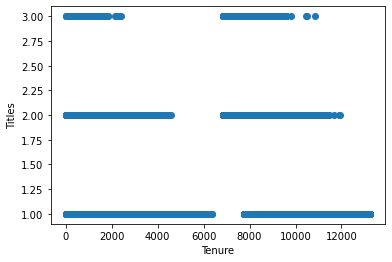

In [212]:
plt.scatter(tenure_series, title_series)

plt.xlabel('Tenure')
plt.ylabel('Titles')


### Use the sleepstudy data. Is there a relationship between days and reaction time?

In [122]:
sleep_df = data('sleepstudy')
sleep_df.head(3)

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308


Pearson Correlation is calculated at 0.535 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


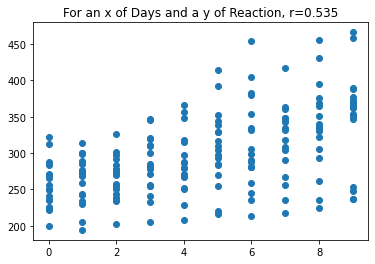

In [130]:
r, p = stats.pearsonr(sleep_df['Days'], sleep_df['Reaction'])
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')
plt.title(f'For an x of Days and a y of Reaction, r={r:.3f}')
plt.scatter(sleep_df['Days'], sleep_df['Reaction'])

In [138]:
# let's separate it out by subject like we did with telco:

In [140]:
x = {}
y = {}
control = ['Subject']
for cntrl in control:
    for val in sleep_df[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['Days'] = sleep_df['Days'][sleep_df[cntrl] == val]
        y[val]['Reaction'] = sleep_df['Reaction'][sleep_df[cntrl] == val]

## Chi 2 Exercises

####  1.   Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 - $H_{0}$:  There is no association between using a macbook and being a Codeup student (independent)
 - $H_{a}$:  there is an association between using a macbook and being a Codeup student (dependent)

In [288]:
# set alpha and confidence
conf_inter = 0.95
alpha = 1 - conf_inter

In [327]:
# create table with image (table) already given
contingency = pd.DataFrame({'Codeup_Student' : [49,1], 'not_codeup': [20,30]}, index=['uses_macbook', 'not_macbook'])

In [328]:
contingency

,Codeup_Student,not_codeup
uses_macbook,49,20
not_macbook,1,30


In [ ]:
# Establish a null hypothesis

In [ ]:
# H0: Macbook Usage is independent of being a Codeup student

In [346]:
contingency = pd.DataFrame({'codeup_student': [49,1], 'not_codeup_student': [20,30]}, index=['uses_macbook', 'not_macbook'])

In [347]:
chi2, p, degf, expected = stats.chi2_contingency(contingency)

In [348]:
confidence = 0.95
alpha = 1 - confidence

In [349]:
print('Observed:\n:')
print(contingency)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')

Observed:
:
              codeup_student  not_codeup_student
uses_macbook              49                  20
not_macbook                1                  30
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

              codeup_student  not_codeup_student
uses_macbook            34.5                34.5
not_macbook             15.5                15.5
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 36.6526
p value: 0.00000000


In [352]:
# Conclusion

if p < alpha:
    print('Our p value is less than our alpha and we can reject the null hypothesis, indicating that macbook is not necessarily independent of codeup matriculation')
else:
    print('We cannot reject the null hypothesis')

Our p value is less than our alpha and we can reject the null hypothesis, indicating that macbook is not necessarily independent of codeup matriculation


#### 2.  Choose another 2 categorical variables from the mpg dataset and perform a chi2  contingency table test with them. Be sure to state your null and alternative hypotheses.
 - $H_{0}$:  There is no association between manufacturer and type of drv (independent)
 - $H_{a}$:  There is an association between manufacturer and type of drv a car has (dependent)

In [302]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [353]:
data('mpg', show_doc="True")

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [304]:
mpg.info

<bound method DataFrame.info of     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
1    compact  
2    compact  
3    compact  
4    co

In [336]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [337]:
mpg['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
subaru        14
hyundai       14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [355]:
observed = pd.crosstab(mpg['class'], mpg['manufacturer'])
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [356]:
# Null hypotheses:
# H0: Vehicle manufacurer is independent of vehicle class type
# keep same alpha and confidence : 0.05 / .95

In [357]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [358]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')

Observed:

manufacturer  audi  chevrolet  dodge  ford  honda  hyundai  jeep  land rover  \
class                                                                          
2seater          0          5      0     0      0        0     0           0   
compact         15          0      0     0      0        0     0           0   
midsize          3          5      0     0      0        7     0           0   
minivan          0          0     11     0      0        0     0           0   
pickup           0          0     19     7      0        0     0           0   
subcompact       0          0      0     9      9        7     0           0   
suv              0          9      7     9      0        0     8           4   

manufacturer  lincoln  mercury  nissan  pontiac  subaru  toyota  volkswagen  
class                                                                        
2seater             0        0       0        0       0       0           0  
compact             0        0    

In [359]:
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that vehicle class type if not independent of manufacturer''')
else:
    print('We cannot reject the null hypothesis')

Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that vehicle class type if not independent of manufacturer


In [342]:
observed.shape

(7, 15)

In [343]:
7 * 15

105

### 3.  Use the data from the employees database to answer these questions:



 - $H_{0}$:  There is no association between using a macobbk and being a Codeup student (independent)
 - $H_{a}$:  there is an association between using a macbook and being a Codeup student (dependent)

In [310]:
# Is an employee's gender independent of whether an employee works
# in sales or marketing?  (only look at current employees)

In [368]:
from env import host, user, password
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url
url = get_db_url(host, user, password, 'employees')

In [369]:
query = '''SELECT e.gender, d.dept_name
FROM employees e
JOIN dept_emp de ON de.emp_no = e.emp_no
AND de.to_date > NOW()
JOIN departments d ON d.dept_no = de.dept_no'''

In [371]:
# load up our data
gender_dept = pd.read_sql(query, url)

In [372]:
gender_dept.head()

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service


In [373]:
gender_dept = gender_dept[(gender_dept.dept_name == 'Sales') | (gender_dept.dept_name == 'Marketing')]

In [374]:
gender_dept

,gender,dept_name
104290,F,Marketing
104291,M,Marketing
104292,F,Marketing
104293,F,Marketing
104294,F,Marketing
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [375]:
observed = pd.crosstab(gender_dept.dept_name, gender_dept.gender)

In [376]:
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [377]:
# H0: Gender is independent of status in sales vs marketing departments

In [378]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [379]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')

Observed:

gender         F      M
dept_name              
Marketing   5864   8978
Sales      14999  22702
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

gender                F             M
dept_name                            
Marketing   5893.242601   8948.757399
Sales      14969.757399  22731.242601
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 0.3240
p value: 0.56919386
degrees of freedom: 1


In [380]:
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest working in Sales compared to Marketing is not independent of employee gender''')
else:
    print('We cannot reject the null hypothesis')

We cannot reject the null hypothesis


In [ ]:
# Is an employee's gender independent of whether or not they 
# are or have been a manager?

In [382]:
query = '''SELECT e.gender, dm.dept_no AS manager_status
FROM employees e
LEFT JOIN dept_manager dm ON dm.emp_no = e.emp_no'''

In [384]:
gender_mngr = pd.read_sql(query, url)

In [385]:
gender_mngr.head()

,gender,manager_status
0,M,None
1,F,None
2,M,None
3,M,None
4,M,None


In [386]:
gender_mngr.fillna(0, inplace=True)

In [387]:
gender_mngr['manager_status'] = gender_mngr.manager_status.apply(lambda x: x if x==0 else 1)